# Quadrotor planning w/ input rate constraint and obstacle avoidance

In [6]:
# problem definition
include("ex2_problem_data.jl");
# solver functions and variable containers
include("solver_suite.jl");

Scaling rows of H
Scaling components of g


In [7]:
# JuMP
jump.solver!(:mosek,false);

# PIPG+ w/ restart
pipg.solver_proxy!(pipg.z,pipg.v,pipg.w,pipg.κK,pipg.κu,pipg.κx,
    pipg.rd2o_restrt,pipg.rd2K_restrt,pipg.rfval_restrt,prb.restrt_idx)

# PIPG+
pipg.reset_var!(:plus)
pipg.solver!();

# PIPGeq
pipg.solver_eq!();

# pipg.plot_solstat();

# ADMM
rival.solver_admm!()

# Chambolle & Pock (variable step)
rival.solver_cp!()

mosek termination status: OPTIMAL
PIPG+ restarted w/ 300 relative distance to optimum: 6.241571205829651e-20
PIPG+ relative distance to optimum: 4.82092626445397e-11
PIPGeq relative distance to optimum: 8.325450409417387e-10
ADMM relative distance to optimum: 3.202582417923642e-8
Chambolle and Pock relative distance to optimum: 1.922449860969811e-10


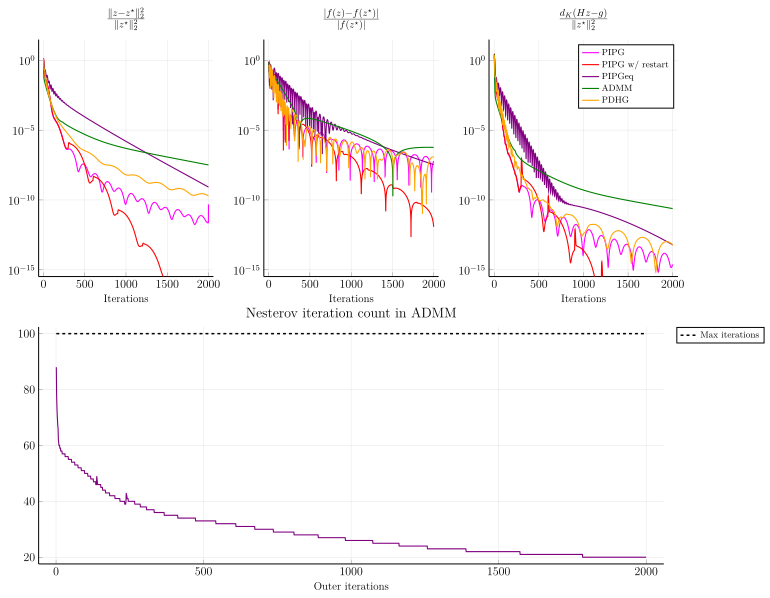

In [8]:
rival.plot_solstat();

In [145]:
x1,u1 = asm.construct_xu(pipg.z)
x2,u2 = asm.construct_xu(jump.z);

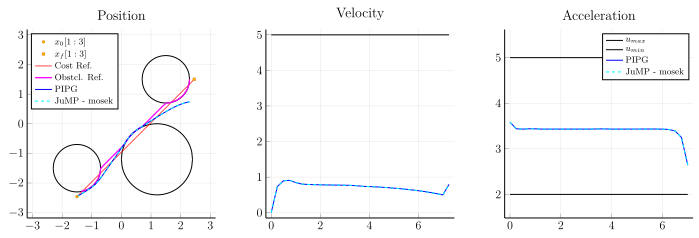

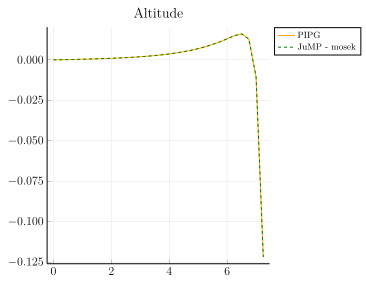

In [146]:
plotter.trajectory2D(x1,u1,x2,u2,:mosek)

In [ ]:
include("ex2_problem_data.jl");
plotter.trajectory2D(nothing,nothing,nothing,nothing,:mosek,false)

```
---------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------
```

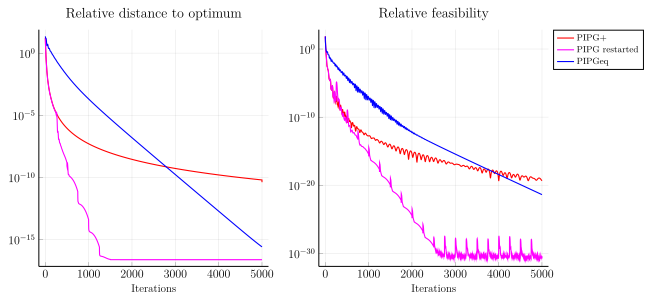

In [231]:
# H g w/o scaling
pipg.plot_solstat();

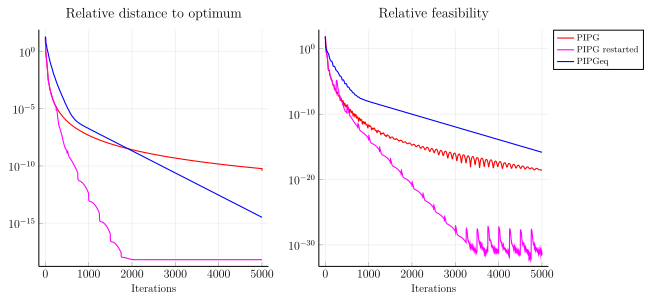

In [11]:
# H g w/ scaling (proj w on)
pipg.plot_solstat();

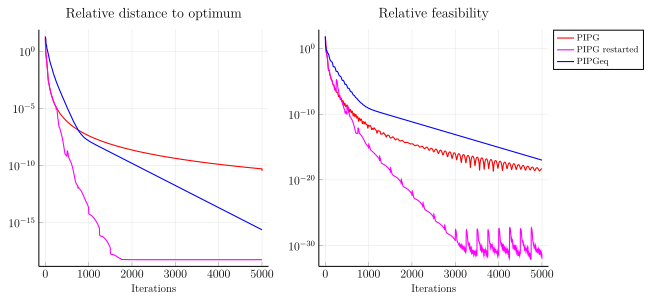

In [7]:
# H g w/ scaling (proj w off)
pipg.plot_solstat();

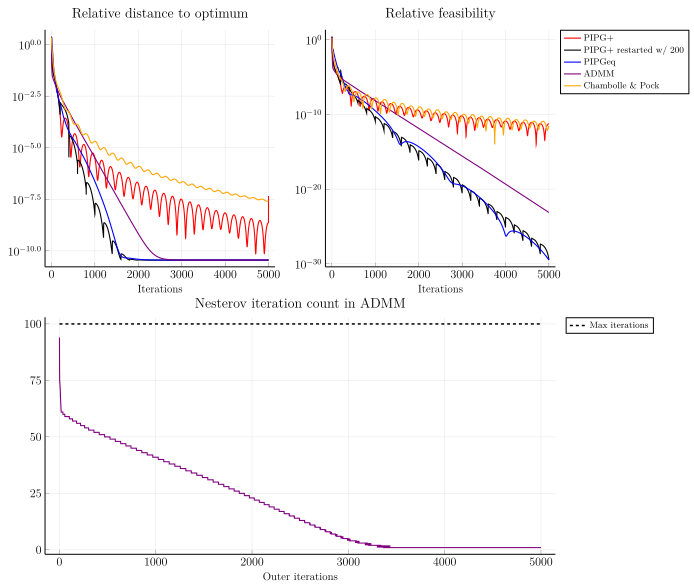

In [18]:
# Q = diag(1.0,1.0)
# R = diag(1.0)
rival.plot_solstat();

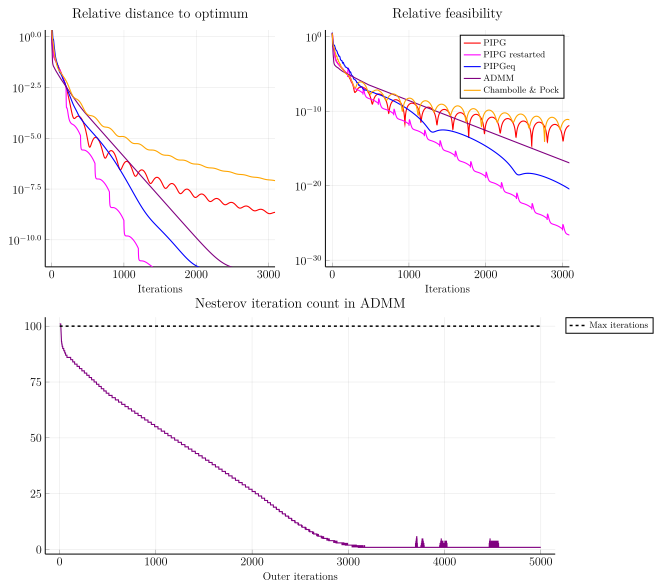

In [36]:
# Q = diag(0.5,2.0)
# R = diag(1.0)
rival.plot_solstat();

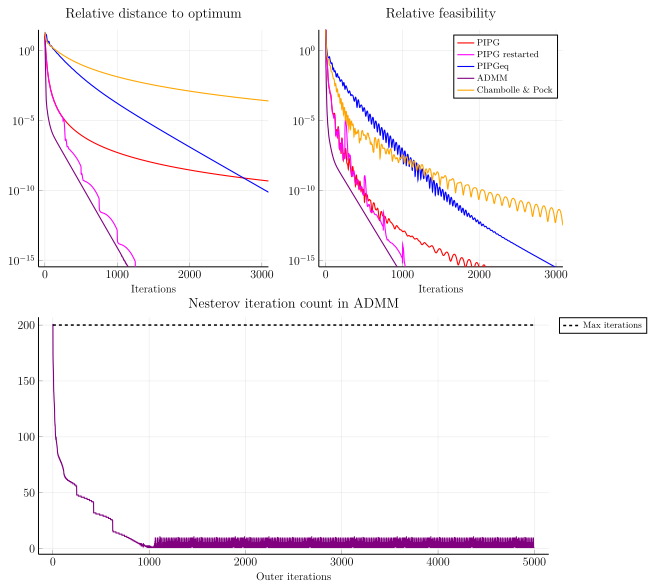

In [216]:
# NEW result w/o scaling
# Q = diag(1.0,3.0)
# R = diag(5.0)
rival.plot_solstat();